# PROJECT-5. Задача регрессии

Александр Журавлев DST-120
***
***

# Этап №2
- подготовка данных и отбор признаков для ML
- моделирование

***
***

## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


***
***

## 2. Загрузка и обработка данных

Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [1]:
# импортируем необходимые библиотеки

# для работы с данными и вычислений
import numpy as np
import pandas as pd

# для ML
from catboost import CatBoostRegressor
from sklearn import linear_model
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
import optuna
import xgboost as xgb

# для поиска выбросов
from sklearn.covariance import EllipticEnvelope 
from  sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# для отбора признаков
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA

# для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
# настройка визуализации
%matplotlib inline
plt.style.use('seaborn-v0_8')
%config InlineBackend.figure_format = "retina"

# не отображаем предупреждения
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

/Users/aleksandrzhuravlev/opt/anaconda3/envs/base_light_plus/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Зададим random_state

In [2]:
random_state = 42

### 2.1. Загрузим данные для обучения моделей

In [3]:
# матрица наблюдений
X = pd.read_csv('data/X_data.csv')
# две целевые переменные
y_data = pd.read_csv('data/y_data.csv')

In [4]:
X.head()

,vendor_id,passenger_count,store_and_fwd_flag,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps,end of road,...,pdow_events_tdmax,pdow_events_tdmin,pm_ptod_tdmax,pm_dg_tdmax,pm_events_tdmax,pm_events_tdmin,ptod_dg_tdmax,ptod_events_tdmax,ptod_events_tdmin,dg_events_tdmax
0,0,1,0,19,3,0,2009.1,164.9,5,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,9,1,0,2513.2,332.0,6,1,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,20,4,0,11060.8,767.6,16,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,11,6,0,1779.4,235.8,4,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,22,2,0,1614.9,140.1,5,0,...,0,0,0,0,0,0,0,1,0,1


In [5]:
y_data.head()

,trip_duration,trip_duration_log
0,455,6.122493
1,663,6.498282
2,2124,7.661527
3,429,6.063785
4,435,6.077642


У нас сохранено 2 целевые переменые: **trip_duration** (время поездки) и ее логарифмированный вариант - **trip_duration_log**. Так как в качестве целевой метрики будет использоваться RMSLE, то возьмем в качестве таргета именно **trip_duration_log**.

In [6]:
# задаем целевую переменную
y = y_data['trip_duration_log']

### 2.2. Разбиваем обучающие данные на обучающую и валидационную выборки

In [7]:
# Создаем тренировочную и тестовую выборки с помощью train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, # таблица с наблюдениями и столбец с правильным ответами
    test_size=0.3, # размер тестовой выборки
    random_state=random_state # число отвечающее за генерацию случайных чисел
)

# Выводим размеры полученных выборок
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_valid.shape))

Train shape: (1000267, 71)
Test shape: (428686, 71)


### 2.3. Кодируем признаки (OneHotEncoding)

In [8]:
# список с признаками для кодирования
columns_to_change = [
    'pickup_time_of_day', 'direction_group', 'events'
    ]

# обучаем и кодируем тренировочну выборку
one_hot_encoder = OneHotEncoder(handle_unknown='ignore') 
data_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
# удаляем исходные столбцы и присоединяем закодированные
X_train = pd.concat(
    [X_train.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Shape of X_train: {}'.format(X_train.shape))

Shape of X_train: (1000267, 80)


In [9]:
# кодируем тестовую выборку
data_onehot = one_hot_encoder.transform(X_valid[columns_to_change]).toarray()
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
# удаляем исходные столбцы и присоединяем закодированные
X_valid = pd.concat(
    [X_valid.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Shape of X_test: {}'.format(X_valid.shape))

Shape of X_test: (428686, 80)


### 2.4. Поиск выбросов

In [10]:
# создаем признак для пометки выбросов
X_train['outliers'] = 0
X_valid['outliers'] = 0

# класс IsolationForest 
iso = IsolationForest()
# обучаем и находим выбросы на тренировочной выборке
y_predicted_train = iso.fit_predict(X_train) 
# находим выбросы на тестовой выборке
y_predicted_test = iso.predict(X_valid) 

# помечаем выбросы на тренировочной выборке
mask = y_predicted_train == -1
X_train.loc[mask, 'outliers'] = 1

# помечаем выбросы на тестовой выборке
mask = y_predicted_test == -1
X_valid.loc[mask, 'outliers'] = 1

### 2.5. Отбор признаков

In [11]:
# используем SelectKBest
selector = SelectKBest(
    f_regression, 
    k=70
)
selector.fit(X_train, y_train)
# создаем список отобранных признаков 
features_sel = selector.get_feature_names_out().tolist()

# обновляем выборки 
X_train = X_train[features_sel]
X_valid = X_valid[features_sel]

**Примечание:** вместо SelectKBest я поробовал использовать PCA для снижения размерности данных. При числе компонент =35 я получил те же результаты при обучении моделей, что и при количестве отобранных признаков =70 в SelectKBest. Однако подбор гиперпараметров просто "вешал" систему, вероятно из-за того, что в данных появлялось много непрерывных числовых признаков (это мое предположение). По итогу решил оставить SelectKBest.

### 2.6. Нормализуем признаки

In [12]:
# нормализуем данные

scaler = preprocessing.MinMaxScaler()             
scaler.fit(X_train)                           # fit() только на train данных
X_train_scaled = scaler.transform(X_train)    # fransform() на train данных
X_valid_scaled = scaler.transform(X_valid)    # fransform() на test данных

### 2.7. Подготовим тестовую выборку

In [13]:
X_test = pd.read_csv('data/test_data.csv')

In [14]:
# кодируем тестовую выборку
data_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
# удаляем исходные столбцы и присоединяем закодированные
X_test = pd.concat(
    [X_test.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Shape of X_test: {}'.format(X_test.shape))

Shape of X_test: (625134, 80)


In [15]:
# создаем признак для пометки выбросов
X_test['outliers'] = 0

# находим выбросы на тестовой выборке
y_predicted_test = iso.predict(X_test) 

# помечаем выбросы на тестовой выборке
mask = y_predicted_test == -1
X_test.loc[mask, 'outliers'] = 1

In [16]:
# отбираем признаки
X_test = X_test[features_sel]

In [17]:
# нормализуем данные
X_test_scaled = scaler.transform(X_test)    # fransform() на test данных

***
***

## 3. Моделирование

### 3.1. Модель линейной регрессии (LinearRegression)

In [18]:
# Создаём модель линейной регрессии
model_lr = linear_model.LinearRegression()
 
# обучаем модель
model_lr.fit(X_train_scaled, y_train)

# делаем предсказание на тренировочной и тестовой выборке
y_train_pred = model_lr.predict(X_train_scaled)
y_valid_pred = model_lr.predict(X_valid_scaled)

# рассчитываем метрики
rmsle_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmsle_valid = np.sqrt(metrics.mean_squared_error(y_valid, y_valid_pred))

# выводим метрики
print(f'Train RMSLE-score: {rmsle_train:0.2f}')
print(f'Valid RMSLE-score: {rmsle_valid:0.2f}')

Train RMSLE-score: 0.46
Valid RMSLE-score: 0.46


***

### 3.2. Модель дерева решений (DecisionTreeRegressor)

In [19]:
# Создаём модель дерева решений
model_dt = tree.DecisionTreeRegressor(random_state = random_state)
 
# обучаем модель
model_dt.fit(X_train_scaled, y_train)

# делаем предсказание на тренировочной и тестовой выборке
y_train_pred = model_dt.predict(X_train_scaled)
y_valid_pred = model_dt.predict(X_valid_scaled)

# рассчитываем метрики
rmsle_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmsle_valid = np.sqrt(metrics.mean_squared_error(y_valid, y_valid_pred))

# выводим метрики
print(f'Train RMSLE-score: {rmsle_train:0.2f}')
print(f'Valid RMSLE-score: {rmsle_valid:0.2f}')

Train RMSLE-score: 0.00
Valid RMSLE-score: 0.48


Оптимизируем гиперпарметры

In [20]:
def optuna_rf(trial):
    # задаем пространства поиска гиперпараметров
    max_depth = trial.suggest_int('max_depth', 3, 15, 1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 3, 10, 1)
    min_samples_split = trial.suggest_int('min_samples_leaf', 3, 10, 1)

    # создаем модель
    model = tree.DecisionTreeRegressor(
        random_state=random_state,
        
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        min_samples_split=min_samples_split
    )
    
    # обучаем модель
    model.fit(X_train_scaled, y_train)
    
    # метрика 
    score = np.sqrt(metrics.mean_squared_error(y_train, model.predict(X_train_scaled)))

    return score

In [21]:
%%time
# cоздаем объект исследования
study = optuna.create_study(study_name="DecisionTreeRegressor", direction="minimize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=50, n_jobs=-1)

[I 2023-04-25 18:46:42,370] A new study created in memory with name: DecisionTreeRegressor
[I 2023-04-25 18:46:54,405] Trial 3 finished with value: 0.38469964569090254 and parameters: {'max_depth': 7, 'min_samples_leaf': 7}. Best is trial 3 with value: 0.38469964569090254.
[I 2023-04-25 18:46:54,457] Trial 9 finished with value: 0.38469964569090254 and parameters: {'max_depth': 7, 'min_samples_leaf': 8}. Best is trial 3 with value: 0.38469964569090254.
[I 2023-04-25 18:46:56,956] Trial 7 finished with value: 0.3695915261200748 and parameters: {'max_depth': 9, 'min_samples_leaf': 4}. Best is trial 7 with value: 0.3695915261200748.
[I 2023-04-25 18:46:57,117] Trial 1 finished with value: 0.3695915261200748 and parameters: {'max_depth': 9, 'min_samples_leaf': 4}. Best is trial 7 with value: 0.3695915261200748.
[I 2023-04-25 18:46:58,552] Trial 8 finished with value: 0.36253044402094353 and parameters: {'max_depth': 10, 'min_samples_leaf': 7}. Best is trial 8 with value: 0.3625304440209435

CPU times: user 10min 41s, sys: 30.9 s, total: 11min 12s
Wall time: 1min 35s


In [22]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("RMSLE на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'max_depth': 15, 'min_samples_leaf': 6}
RMSLE на обучающем наборе: 0.32


In [23]:
# создаем модель с подобранными гиперпараметрами
model_dt_optuna = tree.DecisionTreeRegressor( 
        **study.best_params,                                
        random_state=random_state
)

# обучаем модель
model_dt_optuna.fit(X_train_scaled, y_train)

# делаем предсказание на тренировочной и тестовой выборке
y_train_pred = model_dt_optuna.predict(X_train_scaled)
y_valid_pred = model_dt_optuna.predict(X_valid_scaled)

# рассчитываем метрики
rmsle_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmsle_valid = np.sqrt(metrics.mean_squared_error(y_valid, y_valid_pred))

# выводим метрики
print(f'Train RMSLE-score: {rmsle_train:0.2f}')
print(f'Valid RMSLE-score: {rmsle_valid:0.2f}')

Train RMSLE-score: 0.32
Valid RMSLE-score: 0.36


Определим топ-20 важных признаков для обучения модели

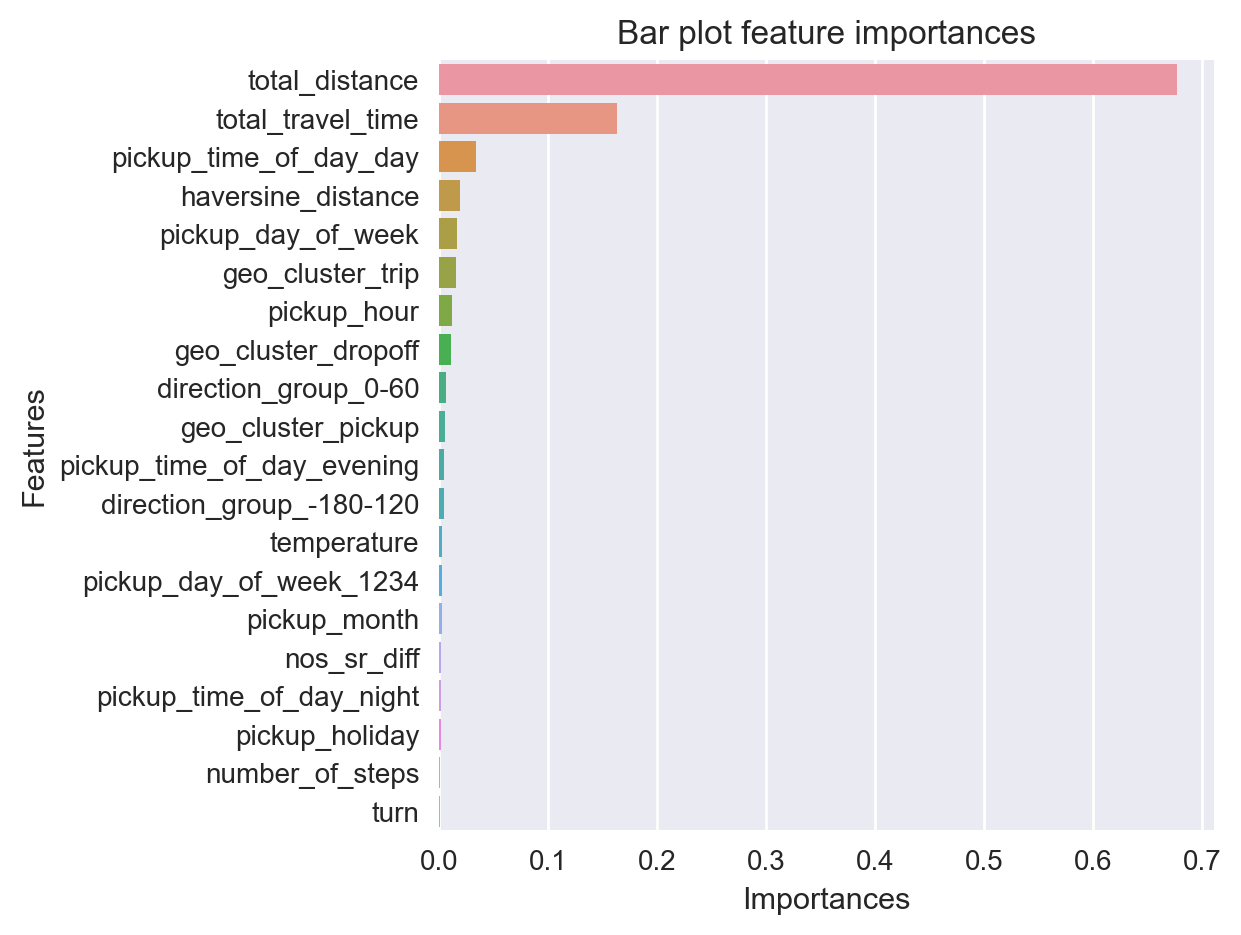

In [24]:
fig, ax = plt.subplots(figsize=(5, 5)) # фигура + координатная плоскость
feature = X_train.columns #признаки
feature_importances = model_dt_optuna.feature_importances_ # важность признаков
# создаем объект Series, чтобы отсортировать по важности признаки
feature_importances_series = pd.Series(
    data=feature_importances,
    index=feature
).sort_values(ascending=False)[:20] # топ-20 признаков
# Строим столбчатую диаграмму
sns.barplot(x=feature_importances_series, y=feature_importances_series.index, ax=ax);
# Добавляем подпись графику, осям абцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Importances')
ax.set_ylabel('Features');

***

### 3.3. Модель случайного леса (RandomForestRegressor)

In [25]:
# Создаём модель дерева решений
model_rf = ensemble.RandomForestRegressor(
    n_estimators=400,
    random_state = random_state,
    n_jobs=-1)
 
# обучаем модель
model_rf.fit(X_train_scaled, y_train)

# делаем предсказание на тренировочной и тестовой выборке
y_train_pred = model_rf.predict(X_train_scaled)
y_valid_pred = model_rf.predict(X_valid_scaled)

# рассчитываем метрики
rmsle_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmsle_valid = np.sqrt(metrics.mean_squared_error(y_valid, y_valid_pred))

# выводим метрики
print(f'Train RMSLE-score: {rmsle_train:0.2f}')
print(f'Valid RMSLE-score: {rmsle_valid:0.2f}')

Train RMSLE-score: 0.12
Valid RMSLE-score: 0.33


Определим топ-20 важных признаков для обучения модели

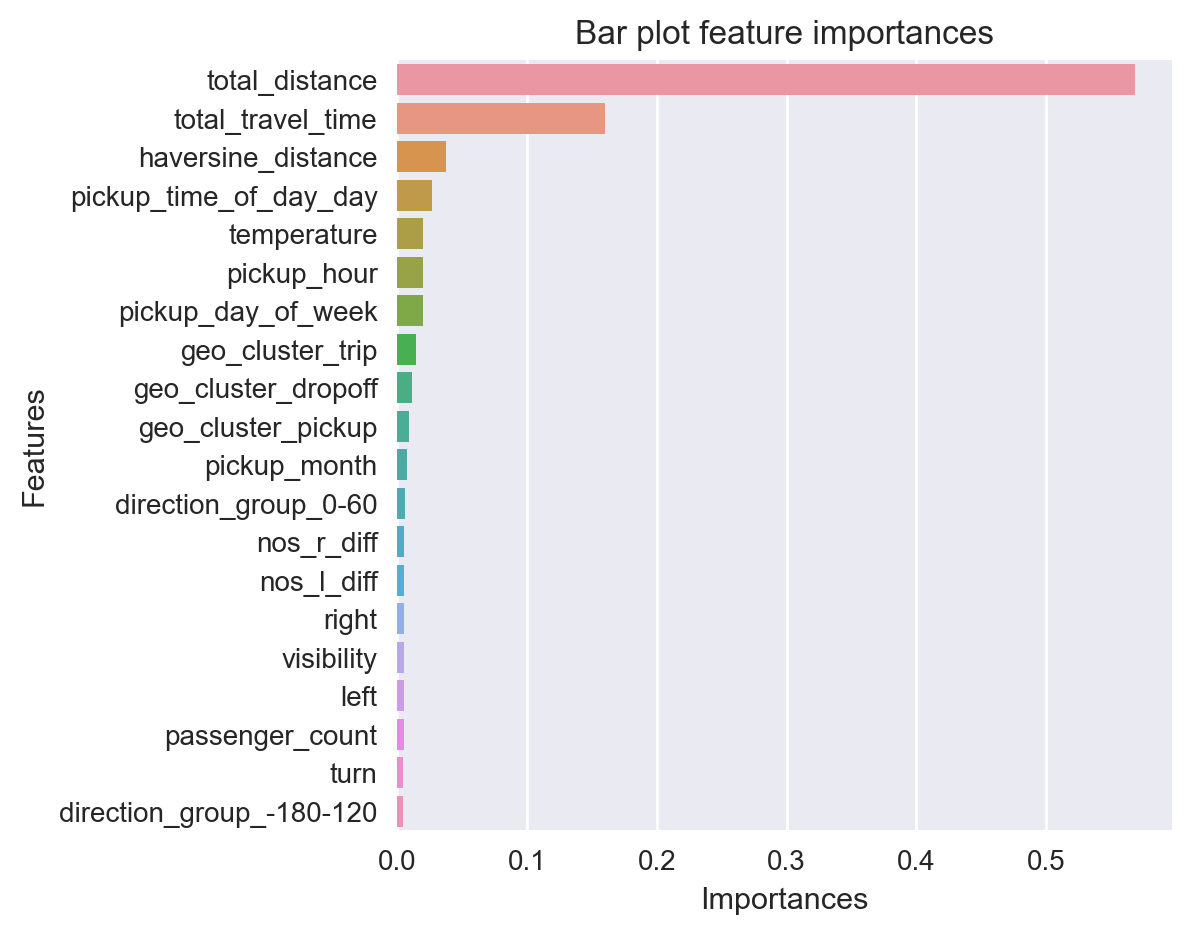

In [26]:
fig, ax = plt.subplots(figsize=(5, 5)) # фигура + координатная плоскость
feature = X_train.columns #признаки
feature_importances = model_rf.feature_importances_ # важность признаков
# создаем объект Series, чтобы отсортировать по важности признаки
feature_importances_series = pd.Series(
    data=feature_importances,
    index=feature
).sort_values(ascending=False)[:20] # топ-20 признаков
# Строим столбчатую диаграмму
sns.barplot(x=feature_importances_series, y=feature_importances_series.index, ax=ax);
# Добавляем подпись графику, осям абцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Importances')
ax.set_ylabel('Features');

***

### 3.4. Модель градиентного бустинга

In [27]:
# Создаём модель дерева решений
model_gb = ensemble.GradientBoostingRegressor(
    random_state = random_state
    )
 
# обучаем модель
model_gb.fit(X_train_scaled, y_train)

# делаем предсказание на тренировочной и тестовой выборке
y_train_pred = model_gb.predict(X_train_scaled)
y_valid_pred = model_gb.predict(X_valid_scaled)

# рассчитываем метрики
rmsle_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmsle_valid = np.sqrt(metrics.mean_squared_error(y_valid, y_valid_pred))

# выводим метрики
print(f'Train RMSLE-score: {rmsle_train:0.2f}')
print(f'Valid RMSLE-score: {rmsle_valid:0.2f}')

Train RMSLE-score: 0.36
Valid RMSLE-score: 0.36


Определим топ-20 важных признаков для обучения модели

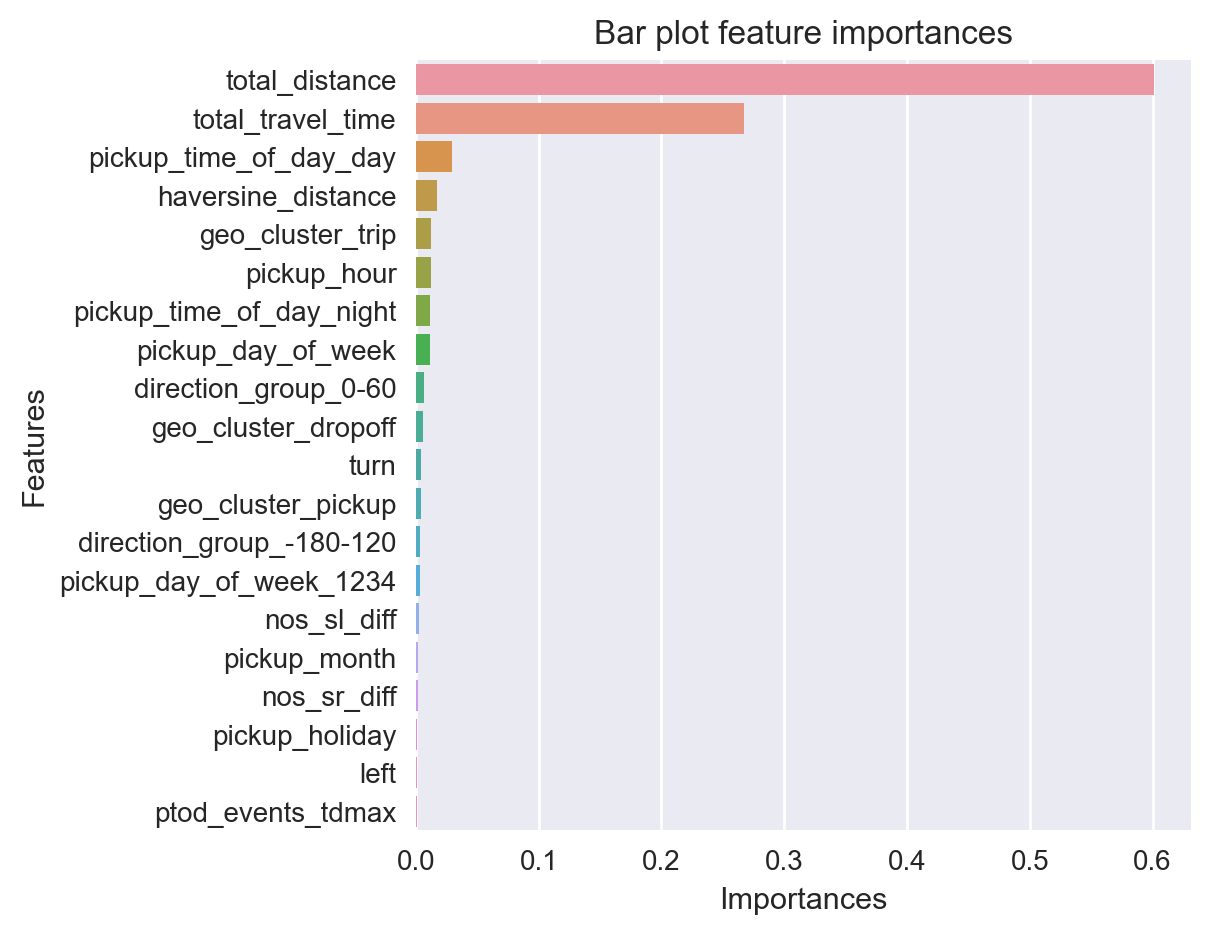

In [28]:
fig, ax = plt.subplots(figsize=(5, 5)) # фигура + координатная плоскость
feature = X_train.columns #признаки
feature_importances = model_gb.feature_importances_ # важность признаков
# создаем объект Series, чтобы отсортировать по важности признаки
feature_importances_series = pd.Series(
    data=feature_importances,
    index=feature
).sort_values(ascending=False)[:20] # топ-20 признаков
# Строим столбчатую диаграмму
sns.barplot(x=feature_importances_series, y=feature_importances_series.index, ax=ax);
# Добавляем подпись графику, осям абцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Importances')
ax.set_ylabel('Features');

***

### 3.5. Модель XGBoost

#### 3.5.1. Простой вариант настроек

In [29]:
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train_scaled, y_train)

# делаем предсказание на тренировочной и тестовой выборке
y_train_pred = model_xgb.predict(X_train_scaled)
y_valid_pred = model_xgb.predict(X_valid_scaled)

# рассчитываем метрики
rmsle_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmsle_valid = np.sqrt(metrics.mean_squared_error(y_valid, y_valid_pred))

# выводим метрики
print(f'Train RMSLE-score: {rmsle_train:0.2f}')
print(f'Valid RMSLE-score: {rmsle_valid:0.2f}')

Train RMSLE-score: 0.32
Valid RMSLE-score: 0.33


#### 3.5.2. Более продвинутый вариант настроек

[0]	train-rmse:5.40379	valid-rmse:5.40440
[10]	train-rmse:1.91774	valid-rmse:1.91808
[20]	train-rmse:0.75161	valid-rmse:0.75187
[30]	train-rmse:0.42530	valid-rmse:0.42567
[40]	train-rmse:0.36173	valid-rmse:0.36235
[50]	train-rmse:0.34959	valid-rmse:0.35057
[60]	train-rmse:0.34520	valid-rmse:0.34646
[70]	train-rmse:0.34238	valid-rmse:0.34403
[80]	train-rmse:0.34061	valid-rmse:0.34257
[90]	train-rmse:0.33896	valid-rmse:0.34118
[100]	train-rmse:0.33770	valid-rmse:0.34018
[110]	train-rmse:0.33647	valid-rmse:0.33917
[120]	train-rmse:0.33527	valid-rmse:0.33821
[130]	train-rmse:0.33429	valid-rmse:0.33756
[140]	train-rmse:0.33319	valid-rmse:0.33683
[150]	train-rmse:0.33236	valid-rmse:0.33627
[160]	train-rmse:0.33164	valid-rmse:0.33594
[170]	train-rmse:0.33097	valid-rmse:0.33559
[180]	train-rmse:0.33019	valid-rmse:0.33509
[190]	train-rmse:0.32969	valid-rmse:0.33486
[200]	train-rmse:0.32919	valid-rmse:0.33468
[210]	train-rmse:0.32872	valid-rmse:0.33454
[220]	train-rmse:0.32823	valid-rmse:0.33437

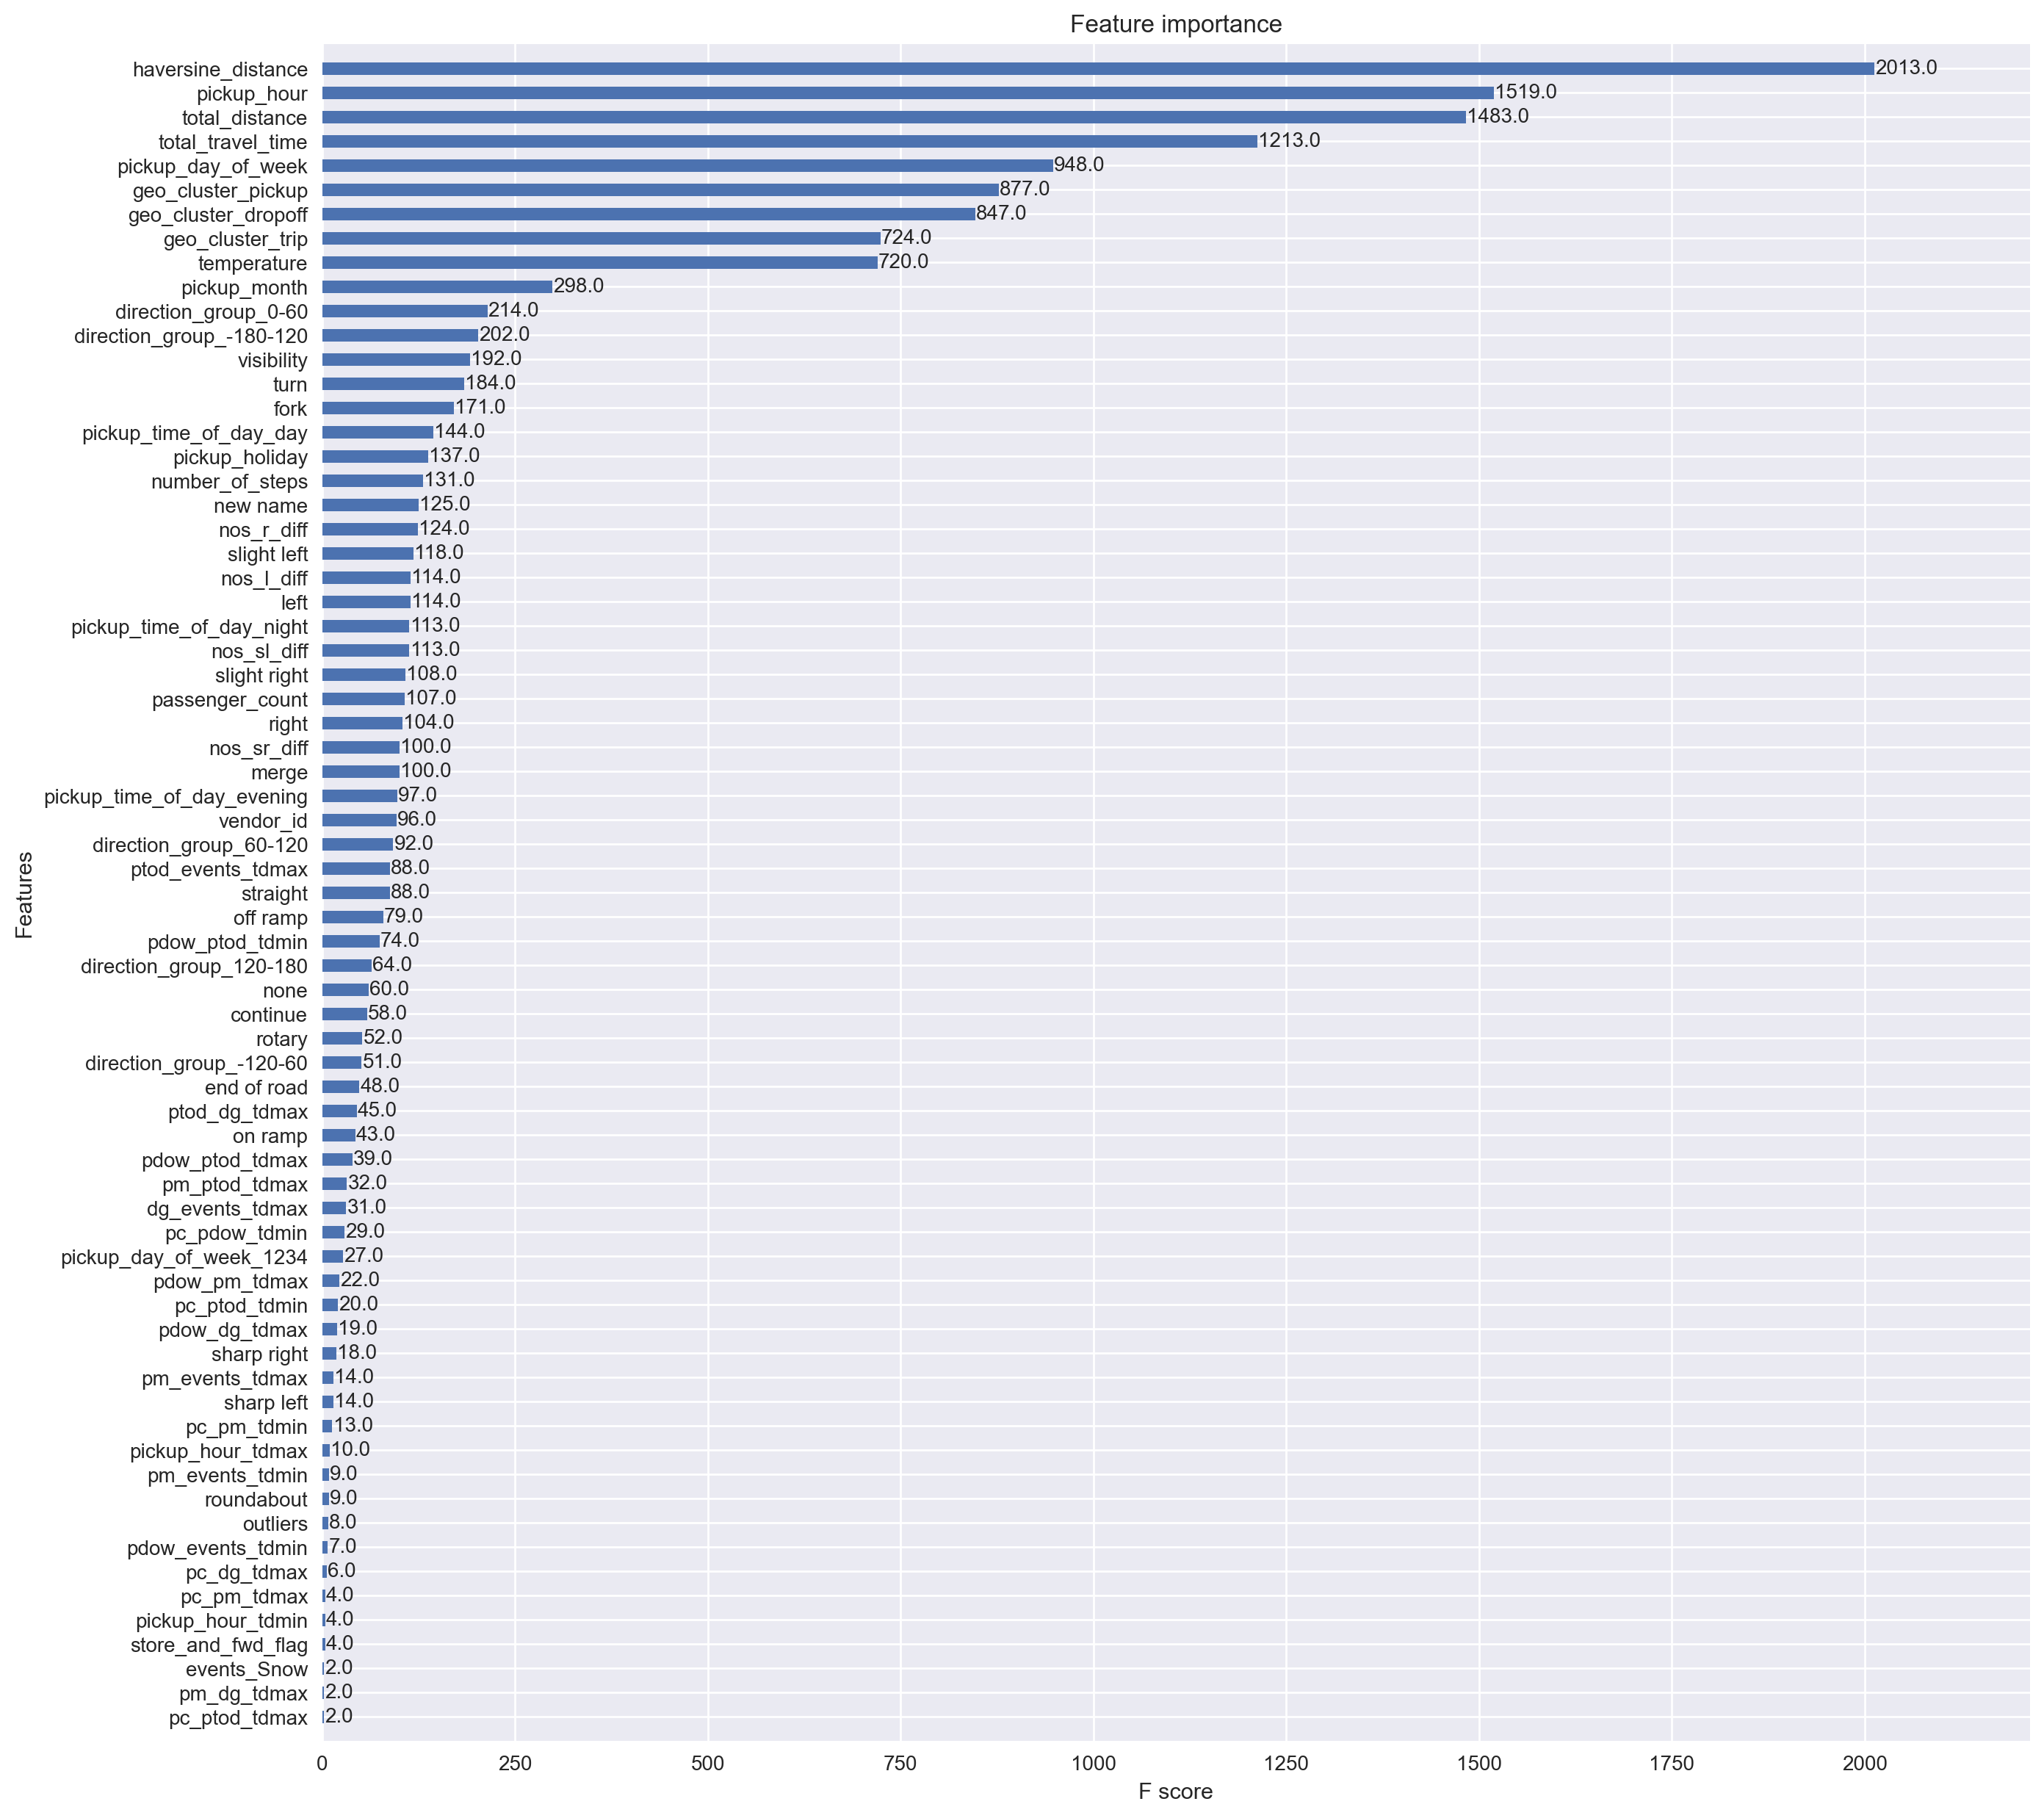

In [30]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train, feature_names=features_sel)
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid, feature_names=features_sel)
dtest = xgb.DMatrix(X_test_scaled, feature_names=features_sel)

# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборки
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #ранняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5);

***

### 3.6. Модель CatBoost

In [32]:
model_cb = CatBoostRegressor(random_state=42)
model_cb.fit(X_train_scaled, y_train)

# делаем предсказание на тренировочной и тестовой выборке
y_train_pred = model_cb.predict(X_train_scaled)
y_valid_pred = model_cb.predict(X_valid_scaled)

# рассчитываем метрики
rmsle_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmsle_valid = np.sqrt(metrics.mean_squared_error(y_valid, y_valid_pred))

# выводим метрики
print(f'Train RMSLE-score: {rmsle_train:0.2f}')
print(f'Valid RMSLE-score: {rmsle_valid:0.2f}')

Learning rate set to 0.121955
0:	learn: 0.6892106	total: 50ms	remaining: 50s
1:	learn: 0.6406449	total: 88.7ms	remaining: 44.2s
2:	learn: 0.5989540	total: 125ms	remaining: 41.6s
3:	learn: 0.5635637	total: 165ms	remaining: 41s
4:	learn: 0.5337156	total: 209ms	remaining: 41.5s
5:	learn: 0.5086034	total: 249ms	remaining: 41.3s
6:	learn: 0.4871375	total: 292ms	remaining: 41.4s
7:	learn: 0.4693223	total: 329ms	remaining: 40.9s
8:	learn: 0.4545810	total: 367ms	remaining: 40.4s
9:	learn: 0.4422166	total: 405ms	remaining: 40.1s
10:	learn: 0.4318102	total: 443ms	remaining: 39.8s
11:	learn: 0.4229389	total: 484ms	remaining: 39.9s
12:	learn: 0.4156755	total: 525ms	remaining: 39.8s
13:	learn: 0.4096394	total: 565ms	remaining: 39.8s
14:	learn: 0.4044814	total: 599ms	remaining: 39.3s
15:	learn: 0.3999008	total: 640ms	remaining: 39.4s
16:	learn: 0.3960863	total: 673ms	remaining: 38.9s
17:	learn: 0.3925007	total: 717ms	remaining: 39.1s
18:	learn: 0.3896973	total: 759ms	remaining: 39.2s
19:	learn: 0.38

***

### 3.5. Модель стекинга

In [36]:
# модели для стекинга
estimators = [
    
    ('xgb', model_xgb),
    ('cb', model_cb)
]

# создаем и обучаем модель
model_stacking = ensemble.StackingRegressor(
    estimators=estimators,
    final_estimator=linear_model.LinearRegression()
)

# обучаем модель
model_stacking.fit(X_train_scaled, y_train)

# делаем предсказание на тренировочной и тестовой выборке
y_train_pred = model_stacking.predict(X_train_scaled)
y_valid_pred = model_stacking.predict(X_valid_scaled)

# рассчитываем метрики
rmsle_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmsle_valid = np.sqrt(metrics.mean_squared_error(y_valid, y_valid_pred))

# выводим метрики
print(f'Train RMSLE-score: {rmsle_train:0.2f}')
print(f'Valid RMSLE-score: {rmsle_valid:0.2f}')

Learning rate set to 0.121955
0:	learn: 0.6892106	total: 66.1ms	remaining: 1m 6s
1:	learn: 0.6406449	total: 106ms	remaining: 53s
2:	learn: 0.5989540	total: 145ms	remaining: 48.1s
3:	learn: 0.5635637	total: 187ms	remaining: 46.6s
4:	learn: 0.5337156	total: 228ms	remaining: 45.4s
5:	learn: 0.5086034	total: 266ms	remaining: 44.1s
6:	learn: 0.4871375	total: 308ms	remaining: 43.6s
7:	learn: 0.4693223	total: 347ms	remaining: 43s
8:	learn: 0.4545810	total: 388ms	remaining: 42.8s
9:	learn: 0.4422166	total: 422ms	remaining: 41.8s
10:	learn: 0.4318102	total: 462ms	remaining: 41.5s
11:	learn: 0.4229389	total: 504ms	remaining: 41.5s
12:	learn: 0.4156755	total: 541ms	remaining: 41s
13:	learn: 0.4096394	total: 582ms	remaining: 41s
14:	learn: 0.4044814	total: 615ms	remaining: 40.4s
15:	learn: 0.3999008	total: 651ms	remaining: 40s
16:	learn: 0.3960863	total: 684ms	remaining: 39.5s
17:	learn: 0.3925007	total: 723ms	remaining: 39.5s
18:	learn: 0.3896973	total: 761ms	remaining: 39.3s
19:	learn: 0.3870070

***
***

## 4. Submission

Определим лучшую модель

In [53]:
best_model = model_cb

In [54]:
test_id_df = pd.read_csv('data/test_id.csv')
test_id = test_id_df['id']

test_pred_log = best_model.predict(X_test_scaled)
test_pred = np.exp(test_pred_log) - 1

In [55]:
submission = pd.DataFrame({'id': test_id, 'trip_duration': test_pred})
submission.to_csv('data/submission.csv', index=False)

***
***

**Выводы:**
- были изучены и очищены первоначальные данные о поездках такси
- были добавлены дополнительные данные (OSRM, погодные и пр.)
- выполнены EDA и FE
- были найдены и помечены выбросы в данных
- произведен отбор признаков
- обучены модели LinearRegression, DecisionTreeRegressor (в т.ч. с подбором гиперпараметров), RandomForestRegressor, GradientBoostingRegressor, XGBoost, CatBoost, модель стекинга
- подбор гиперпараметров осуществлен только на модели дерева решений, т.к. на остальных моделях был слишком ресурсозатратен
- было отмечена важность признаков total_distance и total_travel_time для моделей на основе деревьев
- для модели XGBoost более важными оказались признаки haversine_distance и pickup_hour
- наилучшие результаты показала модель CatBoost (в т.ч. по score)
- получены следующие результаты в соревновании на Kaggle:
    - Public Score 0.42
    - Private Score 0.41